This notebook is a complementary to my YT video LSTM stock price prediction part one do not run the entire notebook because it is meant for  conducting the experiments. Please run each cell block individually

Video link: https://youtu.be/yzNfHFeocSg

In [ ]:
!pip install keras==3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

# Create a simple sine wave dataset without noise

In [ ]:
np.random.seed(42)
t = np.arange(0, 100, 0.1)  # time vector
sin_wave = np.sin(t)
print(sin_wave)

# plot sine wave

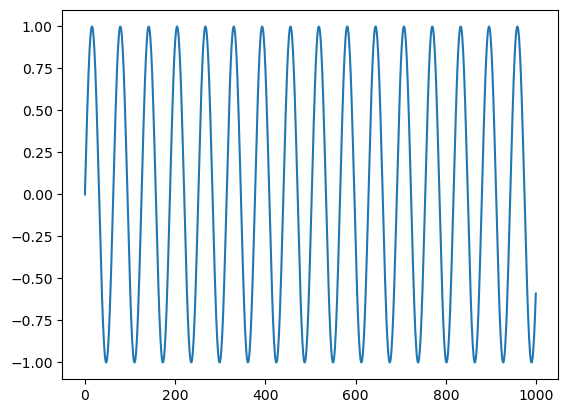

In [ ]:
plt.plot(sin_wave)

# Add noise to the sine wave

In [ ]:
noise = 0.1 * np.random.normal(size=len(t))
sin_wave_noisy = sin_wave + noise
print(sin_wave_noisy)

## plot noisy sine wave

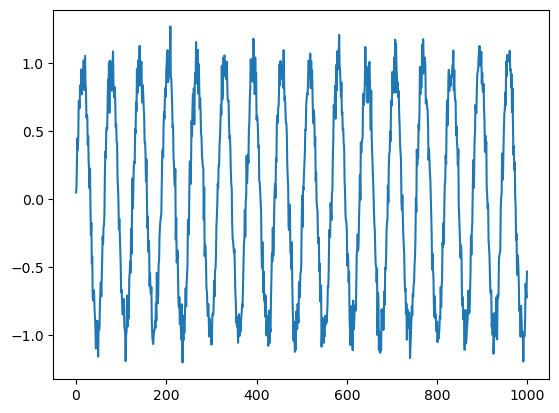

In [ ]:
plt.plot(sin_wave_noisy)

# Plot the clean and noisy sine wave

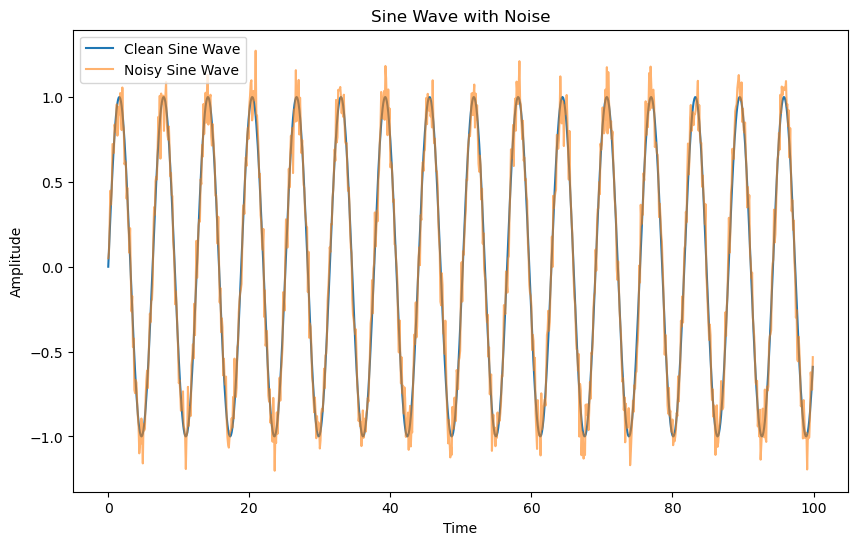

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, sin_wave, label='Clean Sine Wave')
plt.plot(t, sin_wave_noisy, label='Noisy Sine Wave', alpha=0.6)
plt.title('Sine Wave with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# make target variable for simple sine wave, where next value will be high
# then set the value 1 else set the value 0

In [ ]:
target = np.where(sin_wave[1:] > sin_wave[:-1], 1, 0)

# Sequence length will be 10, so LsTM will see most immediate pattern in that
# data window

In [ ]:
sequence_length = 10

# Now we will create the features with sequence length 10
# and target y and split the data with 70% for training and 30% for validation or test

In [ ]:
X = np.array([sin_wave[i:i+sequence_length] for i in range(len(sin_wave)-sequence_length)])
y = target[sequence_length-1:]
split_index = int(0.7 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# we will create simple stacked LsTM network with 1 hidden layer

In [ ]:
model = Sequential()

# input shape is 3d array with batch size, sequence length and number of features. Here we set batch size as none so didn't write anything. sequence_length is 10 and number of features, which are 1 (uni-variate)

In [ ]:
model.add(LSTM(16, return_sequences=True, input_shape=(sequence_length, 1), activation='relu'))
model.add(LSTM(8, return_sequences=True, input_shape=(sequence_length, 1), activation='relu'))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Execute our model and start training using history object

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    verbose=1)


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6959 - loss: 0.6785 - val_accuracy: 0.7037 - val_loss: 0.6166
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7034 - loss: 0.5927 - val_accuracy: 0.7239 - val_loss: 0.5388
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7475 - loss: 0.5259 - val_accuracy: 0.7340 - val_loss: 0.5054
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7215 - loss: 0.5163 - val_accuracy: 0.7475 - val_loss: 0.4739
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7420 - loss: 0.4953 - val_accuracy: 0.7778 - val_loss: 0.4177
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8508 - loss: 0.3684 - val_accuracy: 0.9125 - val_loss: 0.3056
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9378 - loss: 0.2775 - val_accuracy: 0.9529 - val_loss: 0.1713
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9640 - loss: 0.1467 - val_accuracy: 0.9663 - v

# For Noisy Sine wave Harder method first

# Target for noisy sine wave if the next value is higher than the previous one then assign the value one else assign the value 0

In [ ]:
target = np.where(sin_wave_noisy[1:] > sin_wave_noisy[:-1], 1, 0)

# Reshape the data for LSTM input (sequence_length, features)

In [ ]:
sequence_length = 10
X = np.array([sin_wave_noisy[i:i+sequence_length] for i in range(len(sin_wave_noisy)-sequence_length)])
y = target[sequence_length-1:]

# Split the dataset into training and validation sets

In [ ]:
split_index = int(0.7 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Define the LSTM stacked model. We are deliberately making the complex model and afterward we will make the simple model and compare with it.This is just for the understanding of how to use stack LSTM layers, how to use dropouts, implement checkpoints and early stopping.Be warned that this will take very large time even on the GPU so if you are running out of GPU time on Colab or in a rush you can skip this cell block and check the video for the results

In [ ]:
model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=(sequence_length, 1), activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(16, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(8, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(8))  # Last LSTM layer (no return_sequences)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize model network

In [ ]:
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Early stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',    # Monitor the val loss
                               patience=150,           # Num epochs; if no improvement training will be stopped
                               verbose=1,
                               mode='min',            # The training will stop when the quantity monitored has stopped decreasing
                               restore_best_weights=True) # Restores model weights from the epoch with the best value of the monitored quantity.



# Model checkpoint callback

In [ ]:
model_checkpoint = ModelCheckpoint('d:/demos/best_model.keras',   # Path where to save the model
                                   monitor='val_loss',   # Monitor the validation loss
                                   save_best_only=True,  # The latest best model according to the quantity monitored will not be overwritten
                                   mode='min',           # The training will save the model when the quantity monitored has decreased
                                   verbose=1)


# Add callbacks to the fit function


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)


# plot  the chart Showing training vs validation accuracy

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## to reuse the model From earlier checkpoint


In [ ]:
from keras.models import load_model
model = load_model('d:/demos/my_model.keras') # Change the path accordingly


# Now finally this is the LSTM  network which gives the highest accuracy on noisy Sine wave. It is the most basic model and highlights the point that if your data is not complex making the Minimalistic LSTM network makes more sense and outperforms the complex model

In [ ]:
model = Sequential()
model.add(LSTM(8, return_sequences=False, input_shape=(sequence_length, 1), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model as usual, Keep the epochs very low because it doesn't require much training

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)
